###  Text Processing

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
sentences = [
    "I like eggs and ham.",
    "I love chocolate and bunnies.",
    "I hate onions."
]

In [3]:
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words = MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)

In [5]:
tokenizer.word_index

{'i': 1,
 'and': 2,
 'like': 3,
 'eggs': 4,
 'ham': 5,
 'love': 6,
 'chocolate': 7,
 'bunnies': 8,
 'hate': 9,
 'onions': 10}

In [6]:
data = pad_sequences(sequences)
data

array([[ 1,  3,  4,  2,  5],
       [ 1,  6,  7,  2,  8],
       [ 0,  0,  1,  9, 10]])

In [7]:
data = pad_sequences(sequences , maxlen = 5)
data

array([[ 1,  3,  4,  2,  5],
       [ 1,  6,  7,  2,  8],
       [ 0,  0,  1,  9, 10]])

In [8]:
data = pad_sequences(sequences , maxlen = 5  ,  padding =  'post')
data

array([[ 1,  3,  4,  2,  5],
       [ 1,  6,  7,  2,  8],
       [ 1,  9, 10,  0,  0]])

### SPAM DETECTION

In [9]:
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM,GRU,Flatten,Input,GlobalMaxPooling1D,Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam , SGD

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [10]:
data = pd.read_csv(r'sms_spam.csv')
data.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
data.columns = ['label','data']

In [12]:
data.head()

,label,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
data['b_labels'] = data['label'].map({'ham':0 , 'spam':1})
Y = data['b_labels'].values

In [14]:
X_Train , X_Test , Y_Train , Y_Test = train_test_split(data['data'] , Y , test_size = 0.33)

In [15]:
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words = MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(X_Train)
X_Train = tokenizer.texts_to_sequences(X_Train)
X_Test = tokenizer.texts_to_sequences(X_Test)

In [16]:
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens.' %V)

Found 7291 unique tokens.


In [17]:
word2idx

{'i': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'the': 5,
 'u': 6,
 'and': 7,
 'in': 8,
 'is': 9,
 'me': 10,
 'my': 11,
 'for': 12,
 'your': 13,
 'of': 14,
 'it': 15,
 'call': 16,
 'have': 17,
 'on': 18,
 'that': 19,
 '2': 20,
 'are': 21,
 'now': 22,
 'not': 23,
 'so': 24,
 'but': 25,
 'or': 26,
 'can': 27,
 'at': 28,
 'be': 29,
 'will': 30,
 'if': 31,
 "i'm": 32,
 'with': 33,
 'do': 34,
 'ur': 35,
 'just': 36,
 'get': 37,
 'this': 38,
 'no': 39,
 'we': 40,
 '4': 41,
 'up': 42,
 'lt': 43,
 'gt': 44,
 'how': 45,
 'when': 46,
 'go': 47,
 'free': 48,
 'what': 49,
 'ok': 50,
 'out': 51,
 'from': 52,
 'know': 53,
 'all': 54,
 'like': 55,
 'got': 56,
 'then': 57,
 'good': 58,
 'its': 59,
 'am': 60,
 'love': 61,
 'was': 62,
 'come': 63,
 'time': 64,
 'only': 65,
 'day': 66,
 'he': 67,
 'send': 68,
 'want': 69,
 "i'll": 70,
 'ü': 71,
 'there': 72,
 'one': 73,
 'n': 74,
 'sorry': 75,
 'as': 76,
 'text': 77,
 'txt': 78,
 'going': 79,
 'by': 80,
 'lor': 81,
 'da': 82,
 'about': 83,
 'k': 84,
 'see': 85,


In [18]:
X_Train = pad_sequences(X_Train)
X_Train.shape

(3734, 189)

In [19]:
T = X_Train.shape[1]

X_Test = pad_sequences(X_Test , maxlen = T)
X_Test.shape

(1840, 189)

In [20]:
D = 20 #Embedding Demensionality...............Its a hyperparameter so it can be any value
M = 15

i = Input(shape = (T,))
x = Embedding(V + 1 , D)(i)
x = LSTM(M , return_sequences = True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1 , activation = 'sigmoid')(x)

model = Model(i,x)

In [21]:
model.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
r  = model.fit(X_Train , Y_Train , epochs = 10, validation_data=(X_Test,Y_Test))

Epoch 1/10
117/117 [==============================] - 9s 25ms/step - loss: 0.4939 - accuracy: 0.8605 - val_loss: 0.3958 - val_accuracy: 0.8620
Epoch 2/10
117/117 [==============================] - 2s 19ms/step - loss: 0.2994 - accuracy: 0.8680 - val_loss: 0.2500 - val_accuracy: 0.8620
Epoch 3/10
117/117 [==============================] - 2s 19ms/step - loss: 0.1926 - accuracy: 0.8784 - val_loss: 0.1721 - val_accuracy: 0.9723
Epoch 4/10
117/117 [==============================] - 2s 19ms/step - loss: 0.1242 - accuracy: 0.9914 - val_loss: 0.1271 - val_accuracy: 0.9837
Epoch 5/10
117/117 [==============================] - 2s 19ms/step - loss: 0.0866 - accuracy: 0.9952 - val_loss: 0.1014 - val_accuracy: 0.9864
Epoch 6/10
117/117 [==============================] - 2s 19ms/step - loss: 0.0636 - accuracy: 0.9973 - val_loss: 0.0879 - val_accuracy: 0.9880
Epoch 7/10
117/117 [==============================] - 2s 19ms/step - loss: 0.0499 - accuracy: 0.9981 - val_loss: 0.0806 - val_accuracy: 0.9880

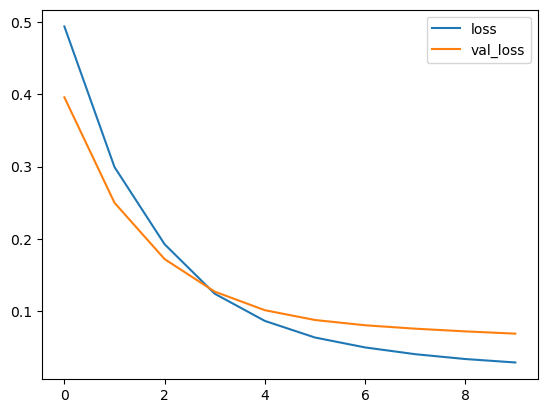

In [23]:
plt.plot(r.history['loss'] , label = 'loss')
plt.plot(r.history['val_loss'] , label = 'val_loss')
plt.legend()

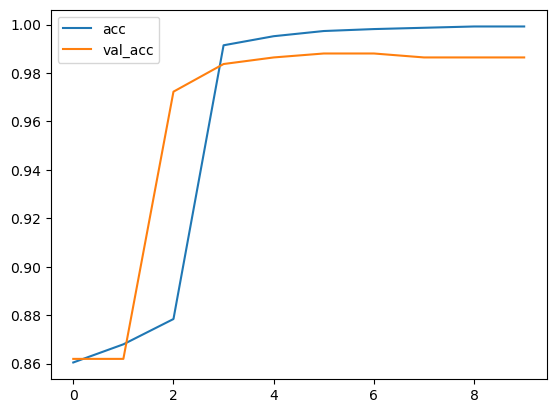

In [24]:
plt.plot(r.history['accuracy'] , label = 'acc')
plt.plot(r.history['val_accuracy'] , label = 'val_acc')
plt.legend()